In [2]:
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
dataset=pd.read_csv("pre_placement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,female,67.00,others,99,central,commerce,76.0,sci&tech,no,25,mkt&hr,76,placed,25262
1,2,female,45.00,others,95,central,commerce,84.0,sci&tech,yes,52,mkt&hr,84,not placed,84623
2,3,female,88.00,others,86,central,commerce,79.0,sci&tech,no,95,mkt&hr,79,placed,50000
3,4,female,88.00,others,89,central,commerce,86.0,sci&tech,yes,86,mkt&hr,86,not placed,65632
4,5,female,44.99,others,89,central,commerce,45.0,sci&tech,no,89,mkt&hr,45,placed,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,101,male,79.00,others,45,others,commerce,56.0,comm&mgmt,yes,86,mkt&fin,86,placed,25262
101,102,male,86.00,others,37,others,commerce,86.0,comm&mgmt,yes,45,mkt&hr,45,placed,5000
102,103,male,45.00,others,95,others,commerce,89.0,comm&mgmt,yes,37,mkt&fin,37,placed,50000
103,104,male,37.00,others,86,others,Arts,89.0,comm&mgmt,yes,51,mkt&hr,79,placed,60000


In [5]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [6]:
dataset['status'].value_counts()


status
placed        87
not placed    18
Name: count, dtype: int64

In [7]:
data=dataset[['mba_p','salary']]

In [8]:
data.corr()

,mba_p,salary
mba_p,1.000000,0.240281
salary,0.240281,1.000000


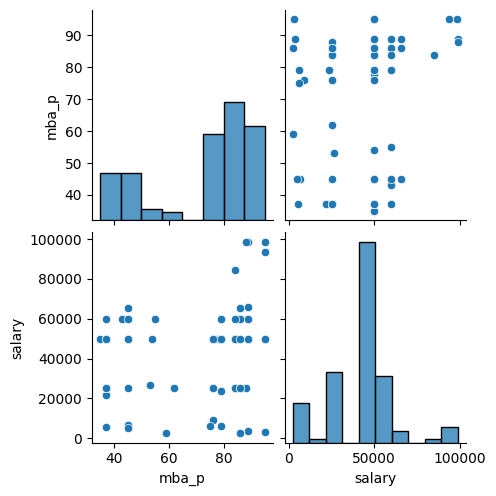

In [9]:
import seaborn as sns
sns.pairplot(data)

In [10]:
dataset['salary'].min()

np.int64(2623)

In [11]:
df=(dataset['salary']>50000).sum()
df

np.int64(25)

In [12]:
import scipy.stats as stats
stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=np.float64(0.6915604425404762), pvalue=np.float64(0.4065877853452614))

In [13]:
dataset.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [15]:
dataset=pd.get_dummies(dataset,drop_first=True)
print(dataset)

     sl_no  ssc_p  hsc_p  degree_p  etest_p  mba_p  salary  gender_male  \
0        1  67.00     99      76.0       25     76   25262        False   
1        2  45.00     95      84.0       52     84   84623        False   
2        3  88.00     86      79.0       95     79   50000        False   
3        4  88.00     89      86.0       86     86   65632        False   
4        5  44.99     89      45.0       89     45   50000        False   
..     ...    ...    ...       ...      ...    ...     ...          ...   
100    101  79.00     45      56.0       86     86   25262         True   
101    102  86.00     37      86.0       45     45    5000         True   
102    103  45.00     95      89.0       37     37   50000         True   
103    104  37.00     86      89.0       51     79   60000         True   
104    105  78.00     89      76.0       75     86   50000         True   

     ssc_b_others  hsc_b_central   hsc_b_others  hsc_s_commerce  \
0            True           Fals

In [21]:
dataset.corr()['salary'].sort_values

salary                    1.000000
hsc_p                     0.300056
degree_p                  0.270229
degree_t_sci&tech         0.250405
mba_p                     0.240281
hsc_s_commerce            0.180765
ssc_b_others              0.138096
specialisation_mkt&hr     0.097708
status_placed             0.073360
hsc_s_science             0.050123
hsc_b_central             0.012942
sl_no                    -0.017407
workex_yes               -0.036718
etest_p                  -0.081482
hsc_b_others             -0.105538
specialisation_mrt&fin   -0.182280
gender_male              -0.236467
ssc_p                    -0.262977
Name: salary, dtype: float64

In [ ]:
 def stdNBgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score,kde=True)
    sum(z_score)/len(z_score)

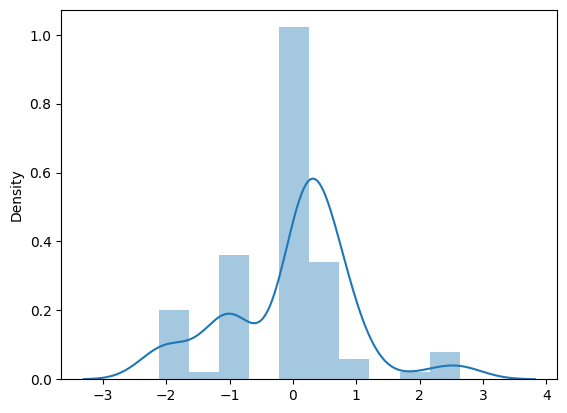

In [36]:
stdNBgraph(dataset["salary"])

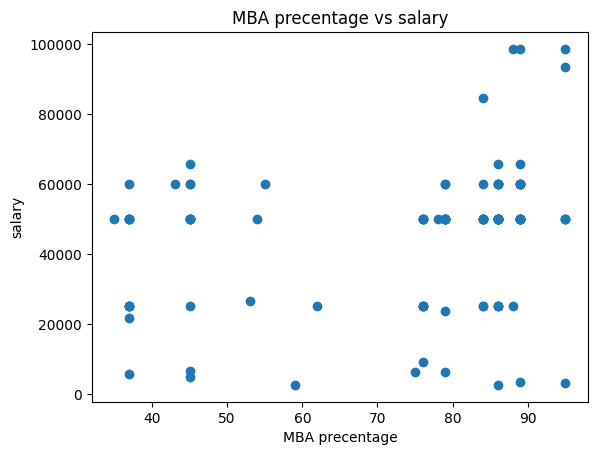

In [22]:
import matplotlib.pyplot as plt
plt.scatter(dataset['mba_p'],dataset['salary'])
plt.xlabel('MBA precentage')
plt.ylabel('salary')
plt.title('MBA precentage vs salary')
plt.show()